# Lab 10 - Sentiment Analysis

## Sentiment Analysis

<center>

![Sentiments.png](https://github.com/GUC-DM/Summer2025/blob/main/lab_content/sentiments.png?raw=1)

</center>

**Sentiment analysis** is about analyzing subjective information in a text, that can be opinions, appraisals, emotions, or attitudes towards a topic, person or entity. It applies Natural Language Processing (NLP) and Text Analysis techniques to highlight the subjective information from the text.


## Business Problem Background and Data Mining Goal

We need to perform sentiment analysis on customer reviews on fine foods from amazon in order to highlight what is missing and the main customer problems and therefore guide the business to the needed improvements.

You can review customer feedback and responses, and thus identify the negative comments and reasons why the customers have issues with your product or service.

**Data Mining Goal:** To classify customers opinions expressed in feedback forums as individual reviews to `Positive`, and `Negative` reviews, to be able to understand the Customer Feedback

## Dataset Description

The dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~28,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<br>

<b>Description of Dataset Columns:</b>

- <b>id:</b> Row Id
- <b>ProductId:</b> Unique identifier for the product
- <b>UserId:</b> Unqiue identifier for the user
- <b>ProfileName:</b> Profile name of the user
- <b>HelpfulnessNumerator:</b> Number of users who found the review helpful
- <b>HelpfulnessDenominator:</b> Number of users who indicated whether they found the review helpful or not
- <b>Score:</b> Rating between 1 and 5
- <b>Time:</b> Timestamp for the review
- <b>Summary:</b> Brief summary of the review
- <b>Text:</b> Text of the review


## Importing Libraries

In [1]:
# !pip install nltk
# !pip install lxml
# !pip install --upgrade nltk
# !pip install wordcloud
# nltk.download('punkt')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re

import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from bs4 import BeautifulSoup


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [3]:
try:
    df = pd.read_csv('../data/amazon_fine_foods.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/Summer2025/refs/heads/main/data/amazon_fine_foods.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...
1,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...
2,110312,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...
3,91856,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...
4,338856,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...


In [4]:
df.shape

(28423, 10)

## Exploratoy Data Analysis & Data Pre-processing

As always, we must first inspect the dataset and visualize it to better understand the problem/data we're dealing with.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28423 entries, 0 to 28422
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      28423 non-null  int64 
 1   ProductId               28423 non-null  object
 2   UserId                  28423 non-null  object
 3   ProfileName             28422 non-null  object
 4   HelpfulnessNumerator    28423 non-null  int64 
 5   HelpfulnessDenominator  28423 non-null  int64 
 6   Score                   28423 non-null  int64 
 7   Time                    28423 non-null  int64 
 8   Summary                 28419 non-null  object
 9   Text                    28423 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,28423.000000,28423.000000,28423.000000,28423.000000,2.842300e+04
mean,282887.922457,1.708863,2.195863,4.192485,1.296428e+09
std,162883.274606,6.675052,7.457280,1.304899,4.786076e+07
min,10.000000,0.000000,0.000000,1.000000,9.444384e+08
25%,142274.000000,0.000000,0.000000,4.000000,1.271506e+09
50%,283624.000000,0.000000,1.000000,5.000000,1.311206e+09
75%,421073.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568445.000000,454.000000,462.000000,5.000000,1.351210e+09


In [7]:
# checking the total number of null values of each feature
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,1
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,4
Text,0


In [8]:
df.isnull().sum()/ len(df)*100

,0
Id,0.000000
ProductId,0.000000
UserId,0.000000
ProfileName,0.003518
HelpfulnessNumerator,0.000000
HelpfulnessDenominator,0.000000
Score,0.000000
Time,0.000000
Summary,0.014073
Text,0.000000


Obviously, there are only 4 null values (1.4%) in "Summary". So, we can simply drop these rows.

In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


Let's take a look at the variable "Score" to see the count of different customer ratings

/tmp/ipython-input-11-4029288367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Score', data = df, palette = 'deep')


<Axes: xlabel='Score', ylabel='count'>

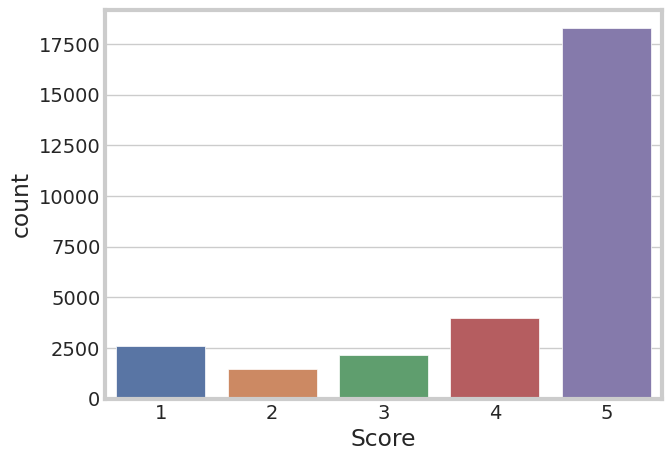

In [11]:
sns.countplot(x = 'Score', data = df, palette = 'deep')

We can see that we have more reviews with rating 5 (i.e. most of the customer ratings are positive). Thus, most reviews will be pretty positive as well.

Let's label different ratings as postive, negative, or neutral to be able to classify reviews later.

- Reviews with "Score" > 3 will be labeled as "positive" sentiment
- Reviews with "Score" < 3 will be labeled as "negative" sentiment
- Reviews with "Score" = 3 will be labeled as "neutral" sentiment

In [12]:
df['Sentiment'] = df['Score'].apply(lambda rating : 'neutral' if rating == 3 else 'positive' if rating > 3 else 'negative')

Let's check the count of Sentiments now

<Axes: xlabel='Sentiment', ylabel='count'>

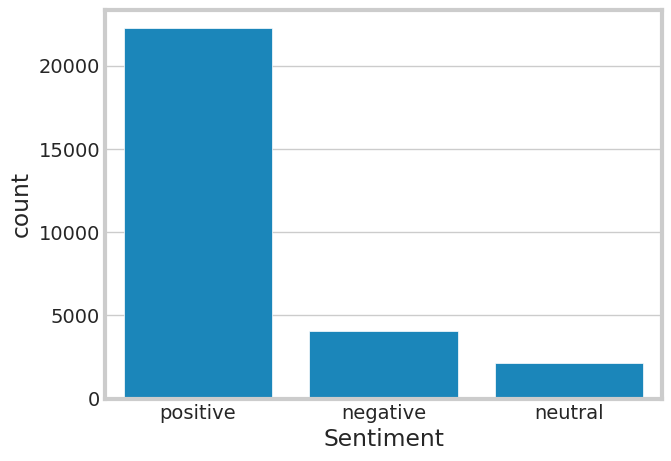

In [13]:
sns.countplot(x = 'Sentiment', data = df)

From the above countplot, it is noticed that `neutral` reviews accounts for only a small percentage of the dataset. Also, they are not important in analyzing the reviews. We are more interested in the `negative` reviews to understand if customers face problems with the products; thus applying the needed improvements to the business.

So, it is better to drop the `neutral` reviews.

In [14]:
neutral_reviews_index = df[df['Sentiment']=='neutral'].index

df = df.drop(neutral_reviews_index)

df['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Let's combine Text and Summary columns for better training

In [15]:
# Combine Text and Summary
df['Reviews'] = df['Text'] + ' ' + df['Summary']
df.drop(['Text', 'Summary'], axis=1, inplace=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Sentiment,Reviews
0,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,positive,I love the Cherry Pie Lara bar. Best and tast...
1,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,positive,Melitta Cafe COllection Blanc et Noir coffee h...
2,110312,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,positive,my girls absolutely loved this tuna. they were...
3,91856,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,positive,The vendor is fast and dependable. The tea is ...
4,338856,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,positive,UPDATE - 8/9/2010<br />A lot can happen in jus...


Our goal is predict the overall sentiment for a new observation based on the review. So "<b>Reviews</b>" is the input feature and "<b>Sentiment</b>" is the class Label. All of the other columns don't affect the sentiment of a review, so we will not use them in modelling.

This problem is a mutliclass classification problem where we want to classify observations into one of the two Sentiments (positive, and negative).

In [16]:
df_copy = df[['Reviews', 'Sentiment']].copy()
df_copy

,Reviews,Sentiment
0,I love the Cherry Pie Lara bar. Best and tast...,positive
1,Melitta Cafe COllection Blanc et Noir coffee h...,positive
2,my girls absolutely loved this tuna. they were...,positive
3,The vendor is fast and dependable. The tea is ...,positive
4,UPDATE - 8/9/2010<br />A lot can happen in jus...,positive
...,...,...
28415,Even though I am a 60s lady I was not a fan of...,positive
28416,I've been feeding my cat this since he was lit...,positive
28417,My 1 year old cocker spaniel loves these! The...,positive
28418,"Absolustely wonderful, tasty and scrumptuous. ...",positive


The **WordCloud** library in Python is used to generate word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance in the text. This library is particularly useful for summarizing text or exploring the relative prominence of terms in datasets like documents, tweets, or reviews.

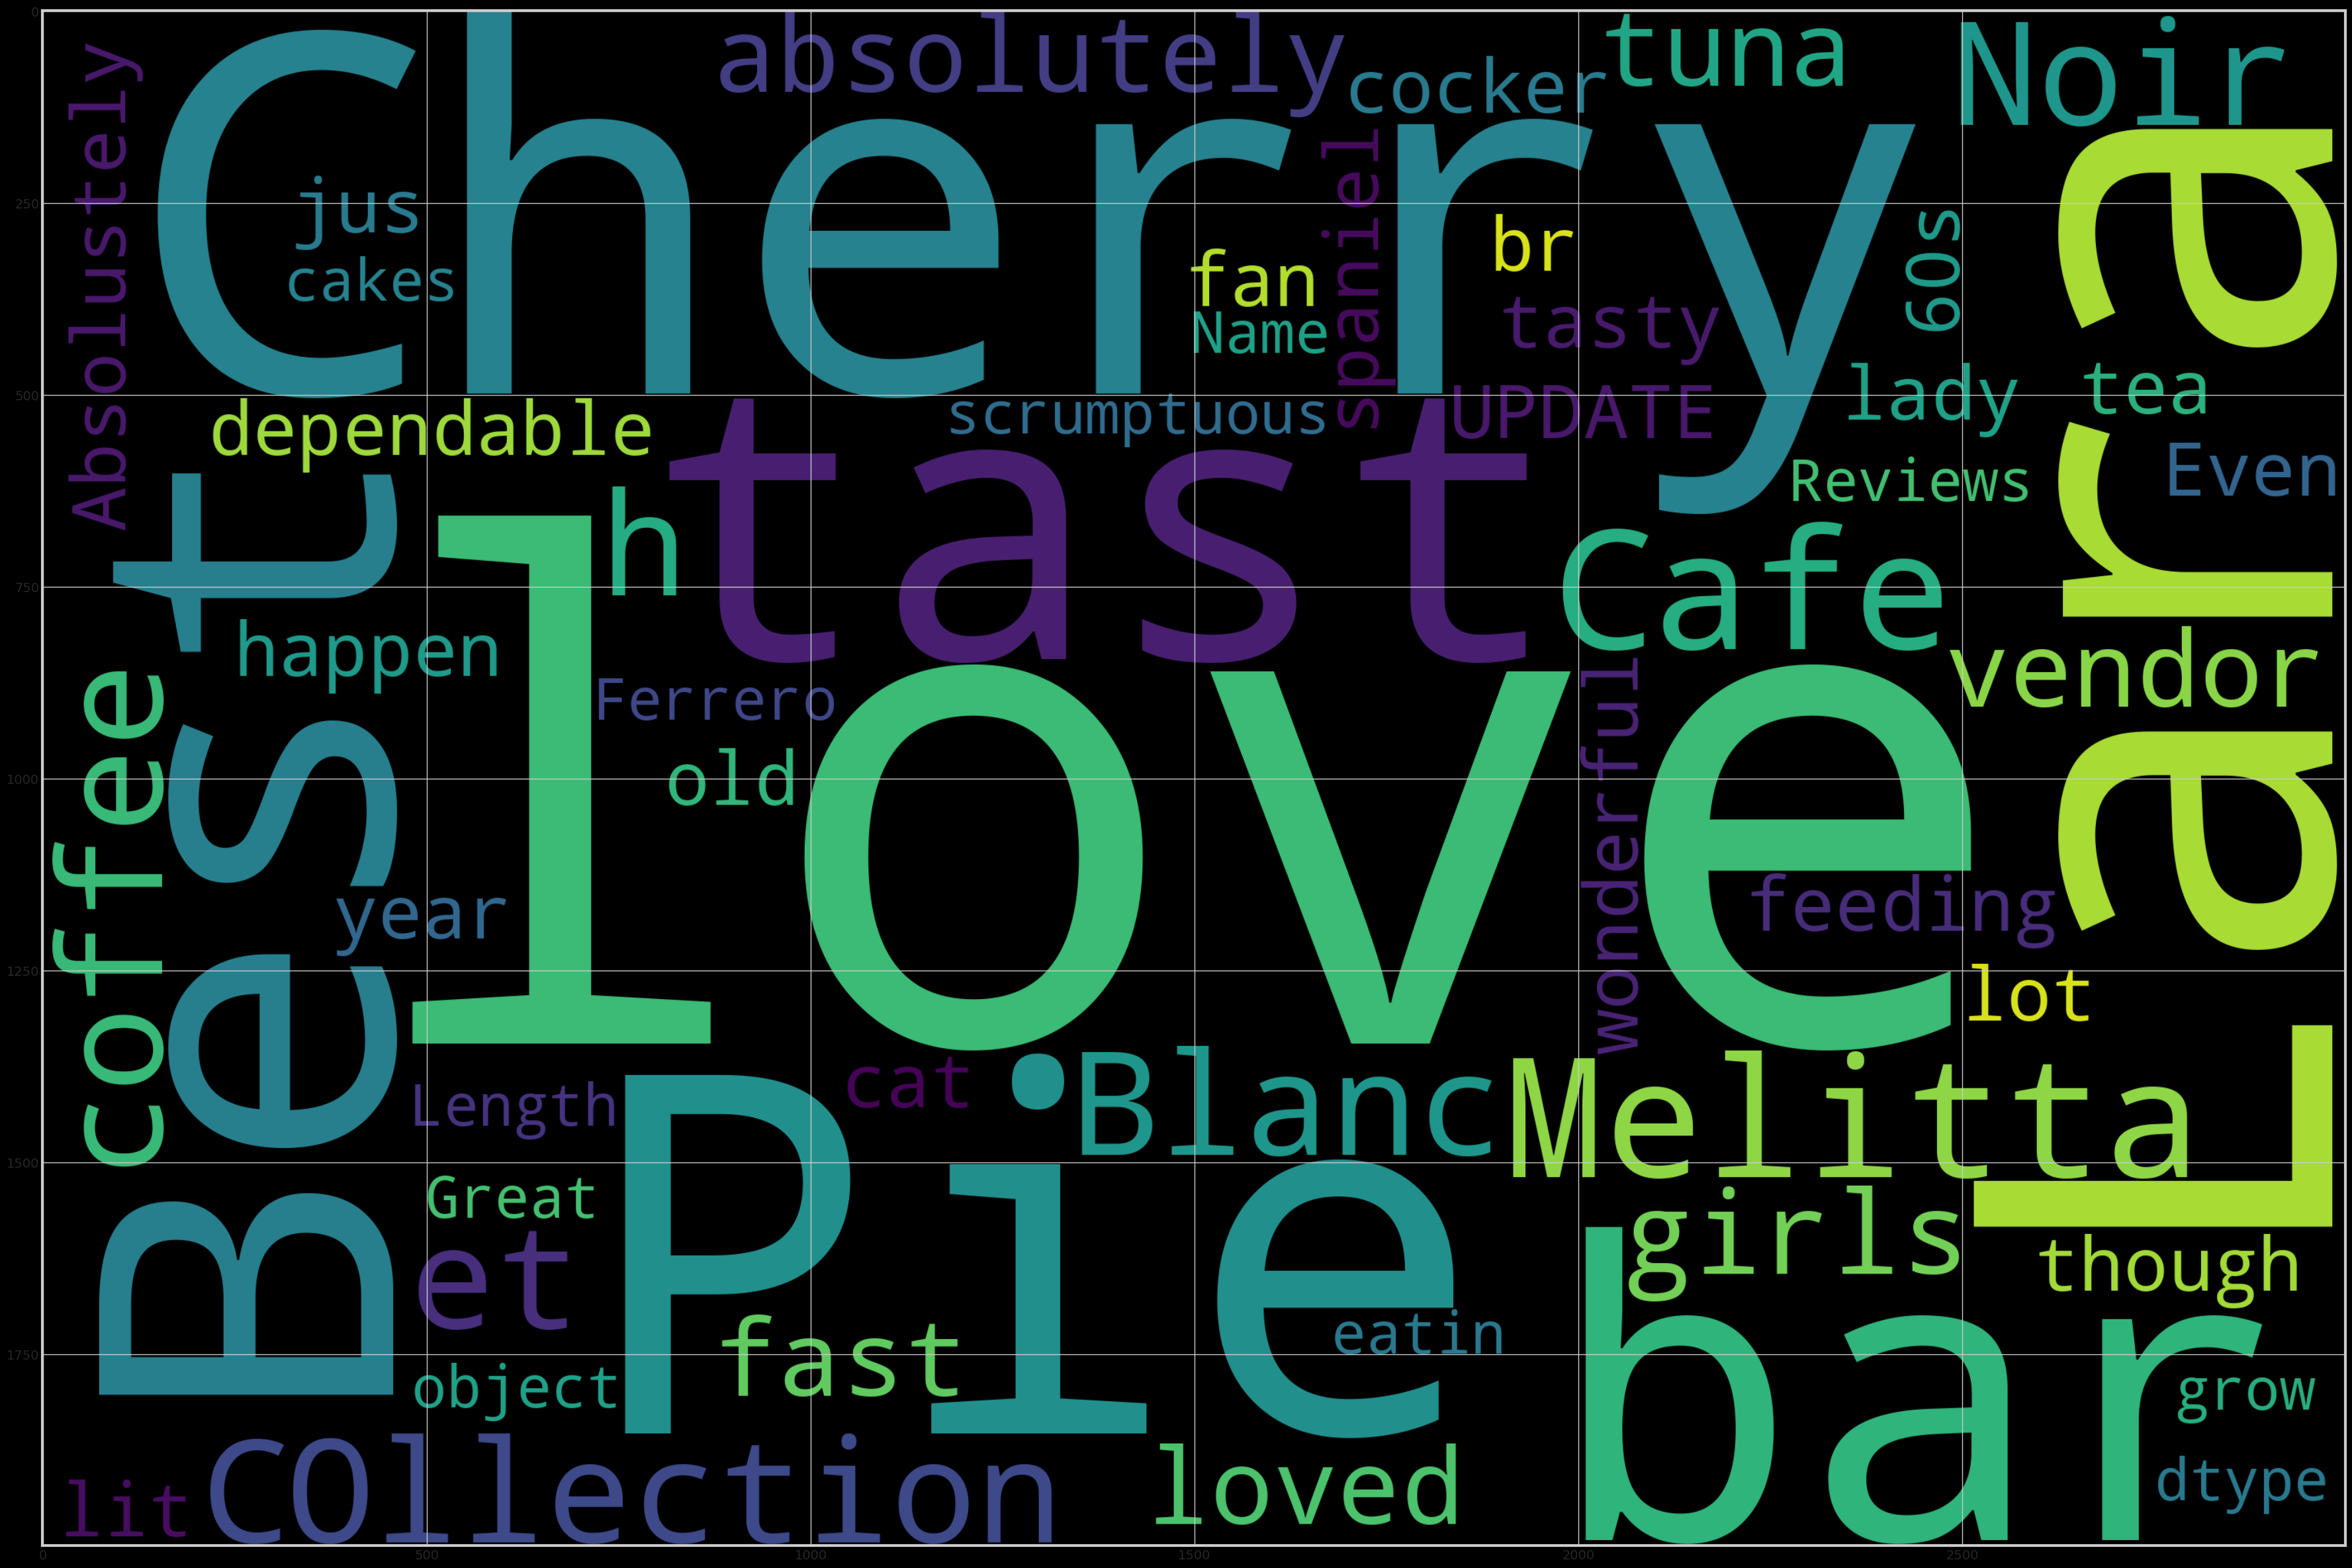

In [17]:
# !pip install wordcloud
# import wordcloud as wc

text = df_copy["Reviews"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

Obviously, there are some HTML Tags in "Reviews" Column that can skew the model performance. So, we need to handle them.

### Removing HTML Tags

BeautifulSoup is a Python library for pulling data out of HTML and XML files. So, we will use it here to extract HTML Tags from "Reviews"

See Documentation here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [18]:
# from bs4 import BeautifulSoup
# !pip install lxml

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df_copy['Reviews']


,Reviews
0,I love the Cherry Pie Lara bar. Best and tast...
1,Melitta Cafe COllection Blanc et Noir coffee h...
2,my girls absolutely loved this tuna. they were...
3,The vendor is fast and dependable. The tea is ...
4,UPDATE - 8/9/2010A lot can happen in just a co...
...,...
28415,Even though I am a 60s lady I was not a fan of...
28416,I've been feeding my cat this since he was lit...
28417,My 1 year old cocker spaniel loves these! The...
28418,"Absolustely wonderful, tasty and scrumptuous. ..."


### Lowercase Conversion and Removing Digits

In [19]:
# import re

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review : re.sub(r"[0-9]", " ", review.lower()))
df_copy['Reviews']

,Reviews
0,i love the cherry pie lara bar. best and tast...
1,melitta cafe collection blanc et noir coffee h...
2,my girls absolutely loved this tuna. they were...
3,the vendor is fast and dependable. the tea is ...
4,update - / / a lot can happen in just a co...
...,...
28415,even though i am a s lady i was not a fan of...
28416,i've been feeding my cat this since he was lit...
28417,my year old cocker spaniel loves these! the...
28418,"absolustely wonderful, tasty and scrumptuous. ..."


### Tokenization

Spliting text into smaller units called tokens (like words, numbers, etc)

The Treebank tokenizer is useful where it separates phrase-terminating punctuation from adjacent tokens. For example,"<b> don't </b>" is tokenized as [<b> "do",  "n't" </b>]

See documentation: https://www.nltk.org/_modules/nltk/tokenize/treebank.html

In [20]:
# !pip install nltk
# import nltk
# from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review: tokenizer.tokenize(review))
df_copy['Reviews']

,Reviews
0,"[i, love, the, cherry, pie, lara, bar., best, ..."
1,"[melitta, cafe, collection, blanc, et, noir, c..."
2,"[my, girls, absolutely, loved, this, tuna., th..."
3,"[the, vendor, is, fast, and, dependable., the,..."
4,"[update, -, /, /, a, lot, can, happen, in, jus..."
...,...
28415,"[even, though, i, am, a, s, lady, i, was, not,..."
28416,"[i, 've, been, feeding, my, cat, this, since, ..."
28417,"[my, year, old, cocker, spaniel, loves, these,..."
28418,"[absolustely, wonderful, ,, tasty, and, scrump..."


### Removing Stopwords

Removing words that do not contribute to meaning.

One of main Challenges of removing stopwords is handling Negation

In [21]:
# ALl English stopwords

# !pip install --upgrade nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

#Importing stopwords Corpus.
nltk.download('stopwords')

#Get the English stopwords
stop_words = stopwords.words('english')
np.unique(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here',
       'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd",
       "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't",
       'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm',
       'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

Obviously, negations are already elements of the stopwords list. However, we don't want to remove negations from Sentiments since this will skew the prediction model performance.

In [22]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
np.unique(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here',
       'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd",
       "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't",
       'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm',
       'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'now', 'o', 'of',
       'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',

In [23]:
# Removing stopwords from "Reviews" Column

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review: [word for word in review if word not in stop_words])
np.unique(df_copy['Reviews'])

array([list(['!', '!', '!', '!', '!', '!', '!', '!', '$', '.', '+', '$', '.', 'shipping', ',', 'box', 'weight', 'onz', ',', 'no', ',', 'no', ',', 'no.other', 'place', 'internet', 'probuct', '$', '.', '?', '?', ',', 'less', 'shipping', 'tooooooooooooo', 'expensive', '!', '!', '!', '!', '!', '!', '!', '!']),
       list(['$', '.', '$', '.', 'store', ',', 'pleased', 'find', 'subscribe', 'save', '$', '.', 'cheaper.', 'good', 'quality', ',', 'sturdy', 'enough', 'toss', 'purse', 'backpack', ',', 'pleasantly', 'sweet', 'without', 'overwhelming.', 'good', 'substitute', 'candy', 'want', 'treat.', 'filling', 'enough', 'hold', 'several', 'hours', "'m", 'go.', 'delicious', 'snack']),
       list(['$', '.', 'cup', 'coffee-', 'sure', 'beats', 'buying', 'starbucks', 'another', 'coffee', 'joint.', 'tastes', 'better', 'flavored', 'k-cups', "'ve", 'tried.', 'great', 'deal']),
       ...,
       list(['zuke', "'s", 'chicken', 'flavored', 'mini', 'treats', 'perfect', 'training', 'dogs', ',', 'especially',

### Punctuation

The `filter()` method filters the given sequence with the help of a function that tests each element in the sequence to be true or not.


**syntax:**

filter(function, sequence)

https://www.geeksforgeeks.org/filter-in-python/

In [24]:
# removing puncuations, and removing any dots, dashes, or empty strings

# import string

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review : list(filter(None,[word for word in review if word not in string.punctuation])))

np.unique(df_copy['Reviews'])

array([list(["''", 'sure', 'would', 'even', 'like', 'keurig', 'coffee', 'maker', "n't", 'like', 'strong', 'coffee', 'wonderful', 'us', 'like', 'mild', 'brews', 'plus', 'little', 'k-cups', 'convienient', 'recommend', 'product.', 'im', 'glad', 'purchased', 'great', 'price']),
       list(["'d", 'almost', 'given', 'locating', 'organic', 'corn', 'bread', 'mix', 'found', 'arrowhead', 'mills', 'corn', 'bread', 'mix.', 'even', 'better', "'s", 'available', 'via', 'amazon', "'s", 'subscribe', 'save', 'program.', 'no', 'longer', 'purchase', 'corn', 'product', "n't", 'organic', 'non-gmo', '--', 'safety', "'s", 'sake.', 'mix', 'makes', 'good', 'corn', 'bread', 'pleasant', 'texture.', 'thank', 'arrowhead', 'mills', 'providing', 'safe', 'alternative', '``', 'mutated', "''", 'corn', 'products', 'thank', 'amazon', 'selling', 'via', 'subscribe', 'save.', 'best', 'worlds', 'encourage', 'anyone', 'concerned', 'food', 'safety', 'switch', 'traditional', 'corn', 'products', 'read', 'gmo', 'corn', 'brought',

We still need to remove few characters

In [25]:
#Replace multiple characters with a single space in each string
df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review: list(filter(None,[re.sub(r"[-._'`*]+", '', word) for word in review])))

# Removing single Characters
df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review : list(filter(None,[word for word in review if len(word)>1])))


# Print the result
np.unique(df_copy['Reviews'])

array([list(['aaah', 'kind', 'tea', 'enjoy', 'cold', 'night', 'like', 'let', 'bag', 'set', 'five', 'minutes', 'true', 'minty', 'sensation', 'smells', 'like', 'wintermint', 'caffeine', 'formula', 'allows', 'enjoy', 'late', 'evening', 'want', 'relaxthis', 'tea', 'leaves', 'slight', 'minty', 'taste', 'mouth', 'drinking', 'this', 'use', 'one', 'teaspoon', 'sugar', 'add', 'sweetness', 'tea', 'naturally', 'tangysweetthe', 'drawback', 'price', 'kind', 'tea', 'll', 'reserve', 'guests', 'fillers', 'christmas', 'stockings', 'teadrinking', 'friends', 'aromatic', 'subtly', 'sweet']),
       list(['aap', 'says', 'not', 'make', 'green', 'beans', 'spinach', 'squash', 'etc', 'due', 'higher', 'levels', 'nitrates', 'thought', 'product', 'would', 'great', 'introduce', 'green', 'beans', 'month', 'old', 'product', 'contains', 'fish', 'oil', 'not', 'suitable', 'candidate', 'month', 'old', 'introductory', 'food', 'age', 'also', 'not', 'returnablewhile', 'amazon', 'site', 'lists', 'product', 'ingredients', 'g

### Lemmatization

<b>Stemming and Lemmatization in Python NLTK are text normalization techniques used for Natural Language Processing.</b>

<b>Stemming</b> is the process of extracting the root of the word. The root words doesn't need to carry a semantic meaning.

For example:
- going → go
- studies, studying → studi
- cries, cry → cri

<br> </br>

Another techniques is <b>Lemmatization</b>, which is the process extracting the base form of the word, namely Lemma, which has a semantic meaning. It works on removing the inflectional endings.

For example, Lemma can be:
- studies → study
- studying → study
- cries, cry → cry
- is → be

For more information: https://www.guru99.com/stemming-lemmatization-python-nltk.html

Here we will use Lemmatization for more accurate results since Lemmatization is preferred over Stemming

In [26]:
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df_copy['Reviews'] = df_copy['Reviews'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
np.unique(df_copy['Reviews'])



[nltk_data] Downloading package wordnet to /root/nltk_data...


array([list(['aaah', 'kind', 'tea', 'enjoy', 'cold', 'night', 'like', 'let', 'bag', 'set', 'five', 'minute', 'true', 'minty', 'sensation', 'smell', 'like', 'wintermint', 'caffeine', 'formula', 'allows', 'enjoy', 'late', 'evening', 'want', 'relaxthis', 'tea', 'leaf', 'slight', 'minty', 'taste', 'mouth', 'drinking', 'this', 'use', 'one', 'teaspoon', 'sugar', 'add', 'sweetness', 'tea', 'naturally', 'tangysweetthe', 'drawback', 'price', 'kind', 'tea', 'll', 'reserve', 'guest', 'filler', 'christmas', 'stocking', 'teadrinking', 'friend', 'aromatic', 'subtly', 'sweet']),
       list(['aap', 'say', 'not', 'make', 'green', 'bean', 'spinach', 'squash', 'etc', 'due', 'higher', 'level', 'nitrate', 'thought', 'product', 'would', 'great', 'introduce', 'green', 'bean', 'month', 'old', 'product', 'contains', 'fish', 'oil', 'not', 'suitable', 'candidate', 'month', 'old', 'introductory', 'food', 'age', 'also', 'not', 'returnablewhile', 'amazon', 'site', 'list', 'product', 'ingredient', 'green', 'bean', 

### Data Preparation for Modelling
#### Label Encoding

Label Encoding for "Sentiment" feature is used since the categories are ordinal.

<br>

<b>Note:</b> Label Encoding assigns labels to cateogries based on their lexicographical order.

So, it will automatically label "<b>negative</b>" as <b>0</b>, and "<b>positive</b>" as <b>1</b>

In [27]:
df_copy['Sentiment'] = df_copy['Sentiment'].astype('category').cat.codes

df_copy['Sentiment']

,Sentiment
0,1
1,1
2,1
3,1
4,1
...,...
28415,1
28416,1
28417,1
28418,1


In [28]:
df_copy['Reviews']

,Reviews
0,"[love, cherry, pie, lara, bar, best, tasty, ba..."
1,"[melitta, cafe, collection, blanc, et, noir, c..."
2,"[girl, absolutely, loved, tuna, heaven, could,..."
3,"[vendor, fast, dependable, tea, simply, best, ..."
4,"[update, lot, happen, couple, month, last, two..."
...,...
28415,"[even, though, lady, not, fan, granola, well, ..."
28416,"[ve, feeding, cat, since, little, love, health..."
28417,"[year, old, cocker, spaniel, love, leave, litt..."
28418,"[absolustely, wonderful, tasty, scrumptuous, p..."


Joining all the words of each review in one string

In [29]:
# each review will be represented as one string

df_copy['Reviews']= df_copy['Reviews'].apply(lambda x : " ".join(x))


### Splitting Data into Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

X = df_copy['Reviews'] #Independent Variable
y = df_copy['Sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Let's check now the Frequency of words in different Sentiments

In [31]:
good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]

Postive Words Frequency using Word Cloud

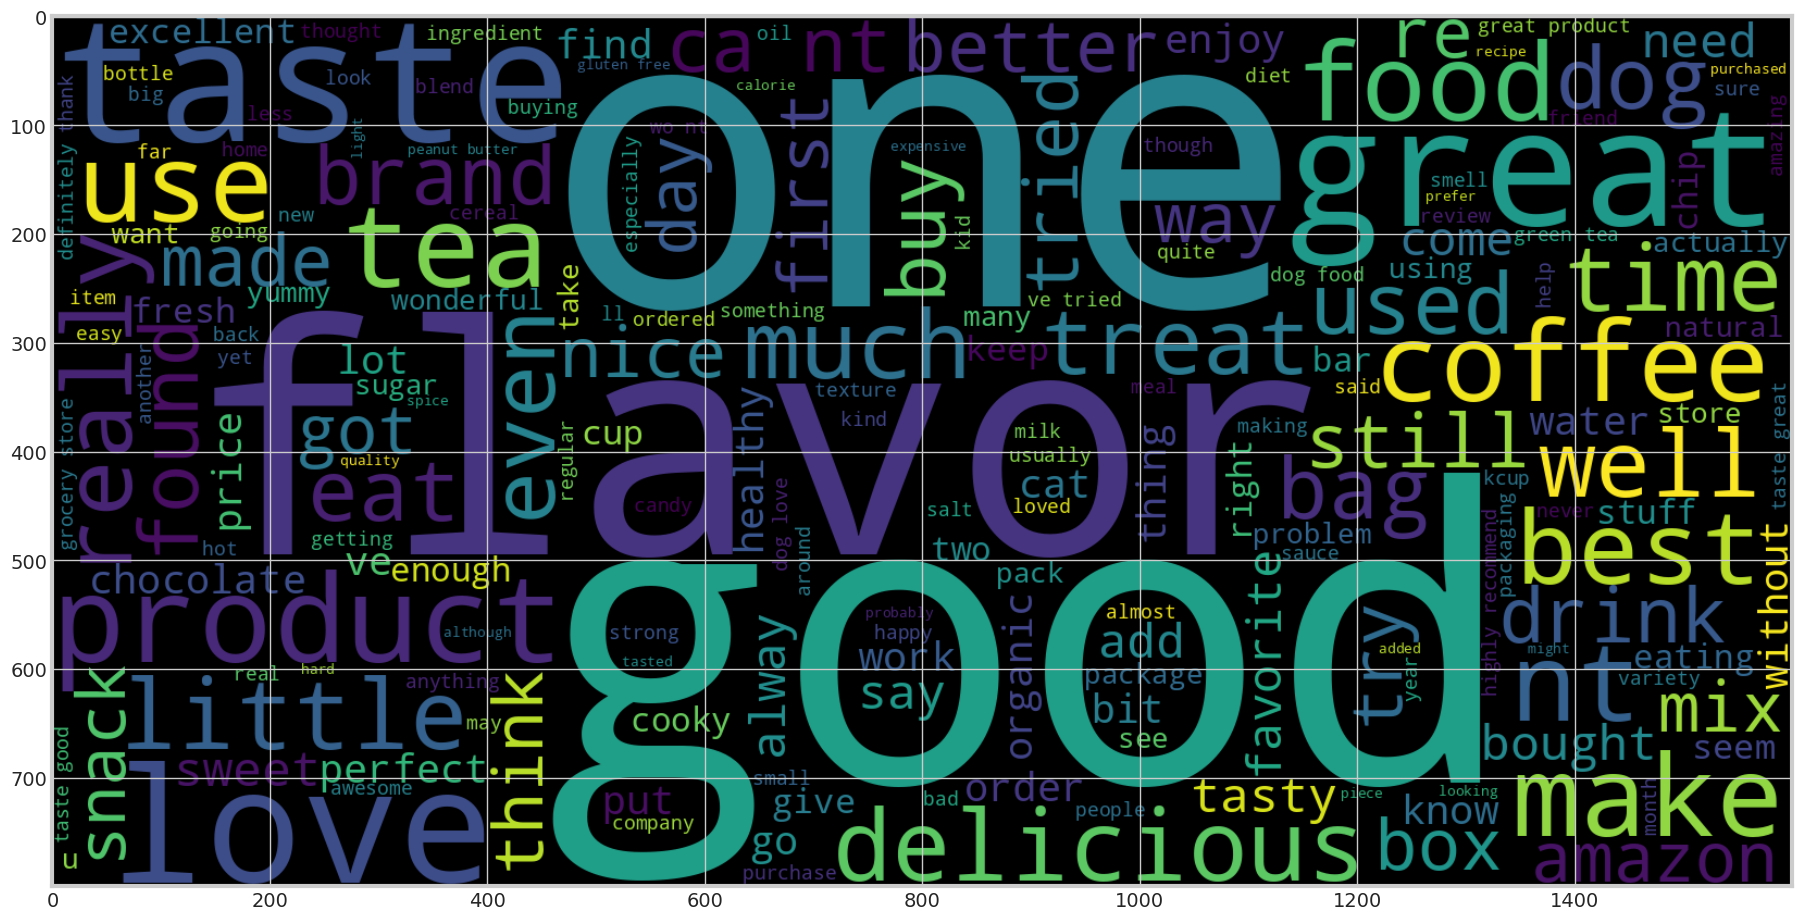

In [32]:
plt.figure(figsize = (20,20)) # Reviews with Good Ratings

good_reviews = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(good))

plt.imshow(good_reviews,interpolation = 'bilinear')

Negative Words Frequency using Word Cloud

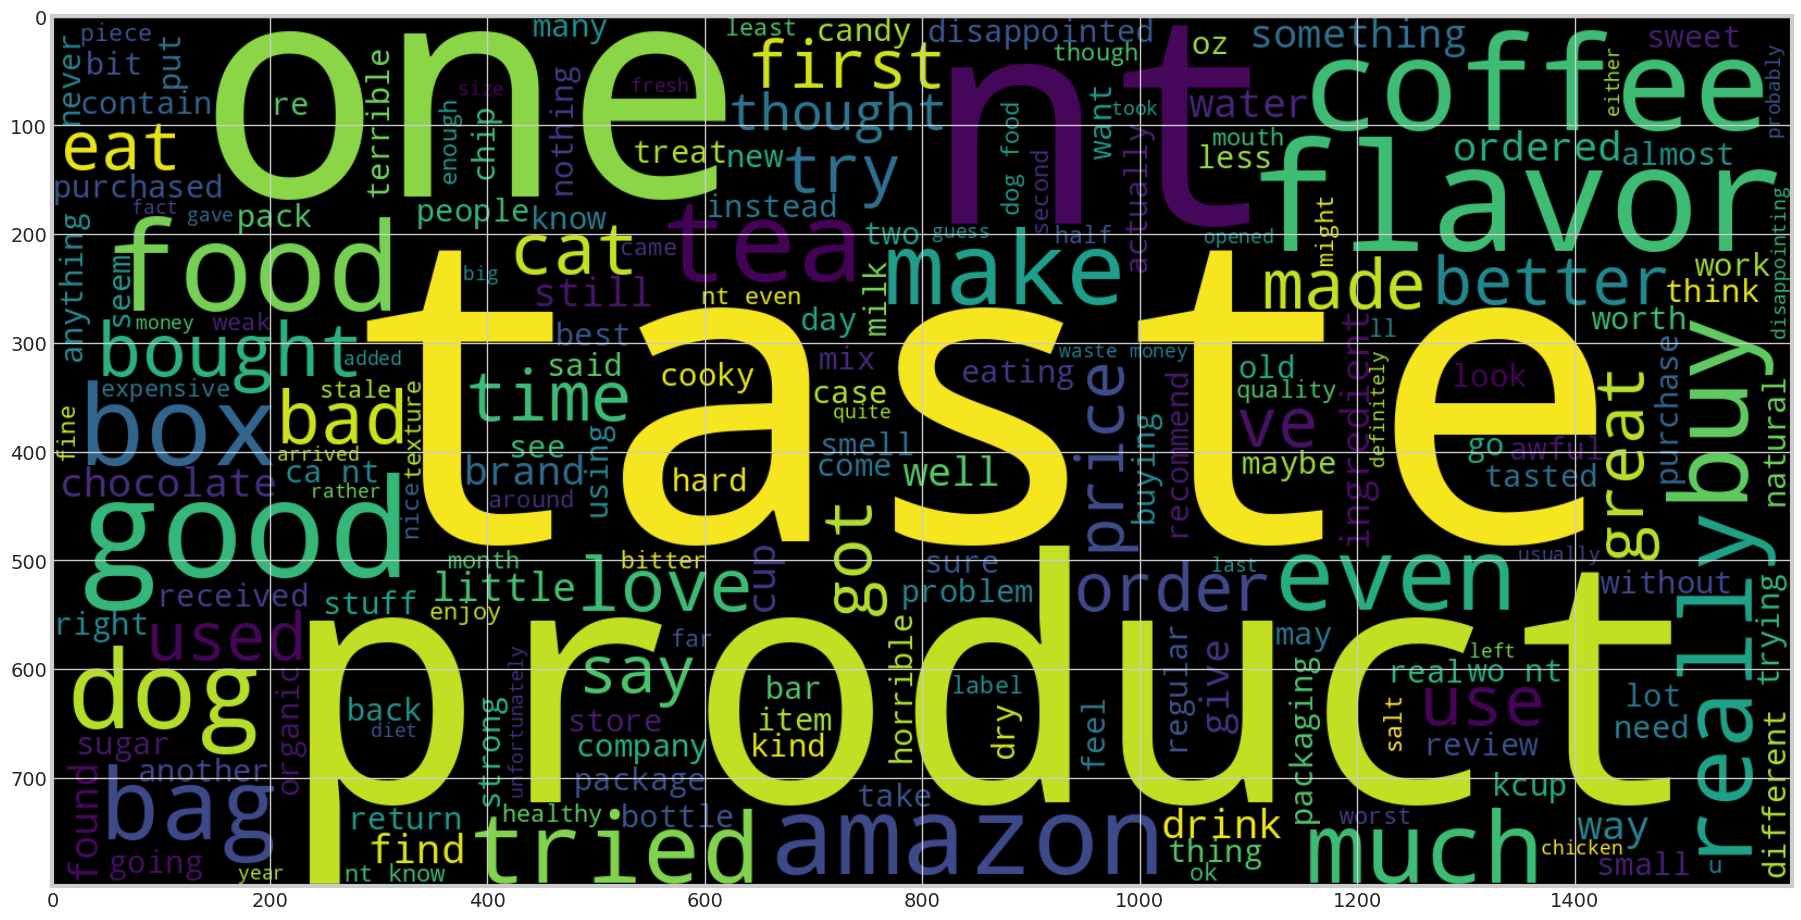

In [33]:
plt.figure(figsize = (20,20)) # Reviews with Negative Ratings

negative_reviews = wc.WordCloud( min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(bad))

plt.imshow(negative_reviews,interpolation = 'bilinear')

#### Trying N-grams

Start with Bigrams and then increase the no. of grams and check the differences

In [34]:
from nltk import ngrams

n_grams_good = pd.Series(ngrams(" ".join(good).split(), 3)).value_counts()[:20]
n_grams_bad = pd.Series(ngrams(" ".join(bad).split(), 3)).value_counts()[:20]


Text(0.5, 0, 'No. of Occurances')

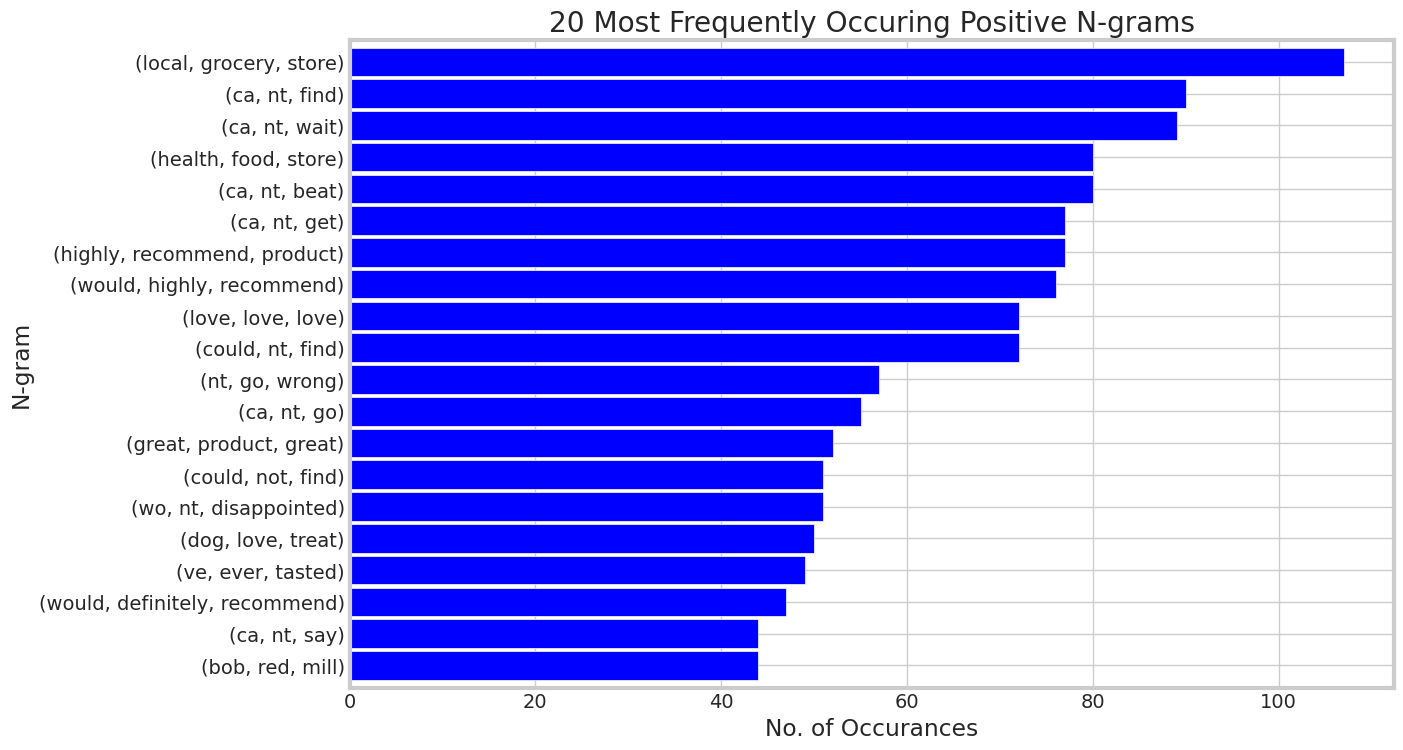

In [35]:
n_grams_good.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Positive N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

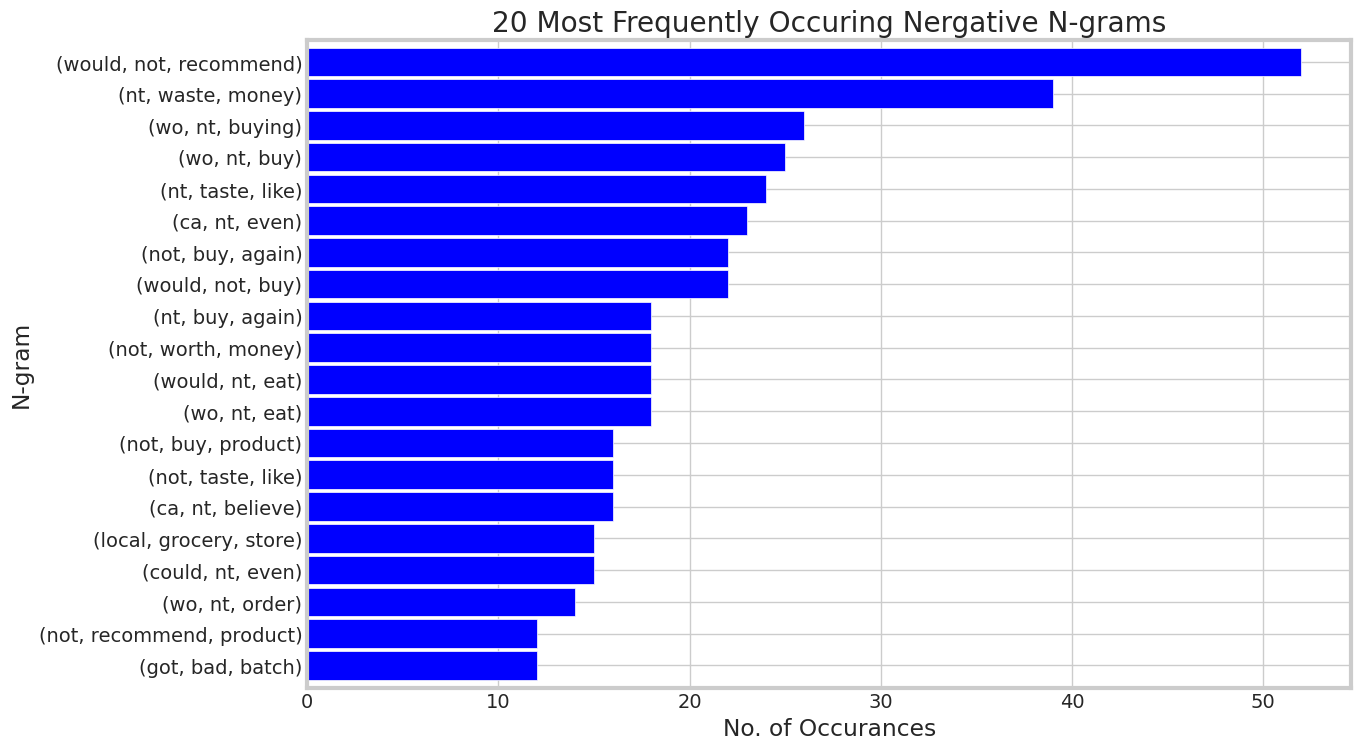

In [36]:
n_grams_bad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Nergative N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

### Encoding Reviews

### There are different Techniques for encoding the Reviews including:

**Bag of Words**

In BoW, we construct a dictionary that contains set of all of the unique words from the text review dataset we have.The frequency of the word is counted here. If there are `d` unique words in all of the text reviews of our dataset, then for every sentence or review, the vector will be of length `d` and count of word from review is stored at its particular location in vector. So, the vector will be highly sparse in such case.

**Ex.** pasta is tasty and pasta is good

**[0]....[1]............[1]...........[2]..........[2]............[1]..........** ==> Its vector representation (all the remaining dots will be represented as zeroes)

**[a]..[and].....[good].......[is].......[pasta]....[tasty].......** ==> This is created dictionary .

<br/>

**TF-IDF**

Term Frequency - Inverse Document Frequency, makes sure that less importance is given to most frequent words and also considers less frequent words.

Thus, `TF-IDF` is better than `Bag of Words` as it contains information on the more important words and the less important ones as well. However, `Bag of Words` is easier to interpret

<br/>

For more information:

https://www.kaggle.com/code/shashanksai/text-preprocessing-using-python/notebook

https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

**For the sake of simplicity, we will be using `Bag of Words` (BoW). We can use `CountVectorizer` from scikit-learn to get the `BoW`**


`CountVectorizer` has many parameters that can be set, including `max_features`. It is simply the threshold set for the most frequently repeated words to place in a dictionary. So, if we set it to  `max_features = 15000`, our vector length will be only 15,000. Also, we can set the `ngram_range` parameter, which defines the lower and upper boundary of the range of n-values for different word n-grams.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

#### Bag of Words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features= 15000, ngram_range=(2,3))

cv_train_reviews = count_vect.fit_transform(x_train) #transformed train reviews

cv_test_reviews = count_vect.transform(x_test) #transformed test reviews

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (18403, 15000)
BOW_cv_test: (7887, 15000)


## Modelling

Note that our aim is to determine the sentiment of a given review, based on an already labeled dataset with customer sentiments (Negative, or Positive). So, we need to use a supervised learning classification algorithm, to be able to classify a given review to the `Positive`, or `Negative` class.

 Here, we will try `Naive Bayes Classifier` and `Random Forest Classifier` and then we will compare their performance.

### Naive Bayes Classifier

Naive Bayes classifier has many types including, Multinomial Naive bayes, Gaussian Naive bayes, and others.

Multinomial Naive bayes is good at handling discrete values and Gaussian Naive bayes is good at handling continuous ones.

Multinomial Naive bayes algorithm is the baseline solution for sentiment analysis tasks. The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes.

Multinomial Naive bayes simply assumes multinomial distribution for all the pairs. This works well for data which can easily be turned into counts, such as word counts in text.

<br/>

**For more information:**

https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes

https://towardsdatascience.com/sentiment-analysis-of-tweets-using-multinomial-naive-bayes-1009ed24276b


**So, we will use Multinomial Naive bayes in this Lab**

In [38]:
from sklearn.naive_bayes import MultinomialNB

mn_model = MultinomialNB()

Fitting data into model

In [39]:
mn_model.fit(cv_train_reviews, y_train)

MultinomialNB()

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(random_state=42)

Fitting data into model

In [41]:
random_forest_clf.fit(cv_train_reviews, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

Please note that this Dataset is considered an imbalanced one since we are interested in the negative reviews more than the others. Analyzing Negative reviews is important for the business to decide on which products need to be enhanced or may be replaced by others.

Thus, we have to use one of the following metrics to evaluate the models: `Precision`, `Recall`, or `F1_score`.

### Naive Bayes Classifier

In [42]:
mn_y_pred = mn_model.predict(cv_test_reviews)

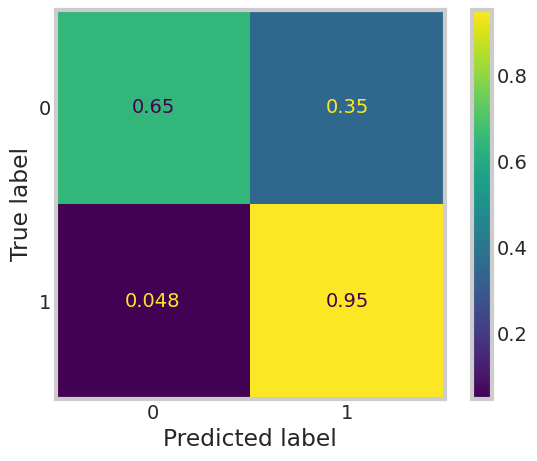

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, mn_y_pred, labels=mn_model.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mn_model.classes_)
disp.plot()
plt.grid(False)



In [44]:
from sklearn.metrics import classification_report

clf_report = pd.DataFrame(classification_report(y_test, mn_y_pred, output_dict=True))

print("Result:")
print("===============================================")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, mn_y_pred)}\n")


Result:
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.713137     0.935284  0.903766     0.824210      0.900470
recall        0.645631     0.951737  0.903766     0.798684      0.903766
f1-score      0.677707     0.943438  0.903766     0.810573      0.901795
support    1236.000000  6651.000000  0.903766  7887.000000   7887.000000
_______________________________________________
Confusion Matrix: 
 [[ 798  438]
 [ 321 6330]]



### Random Forest Classifier¶

In [45]:
rf_y_pred = random_forest_clf.predict(cv_test_reviews)

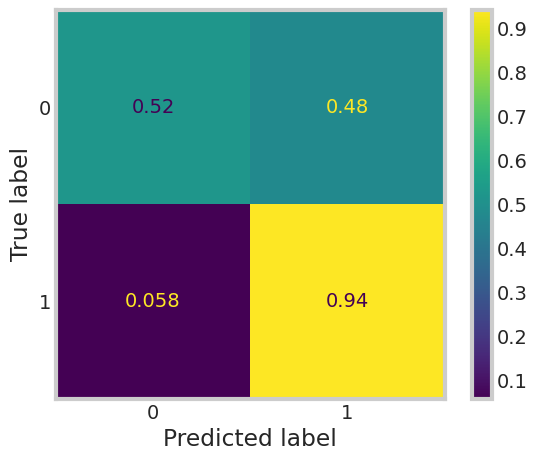

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_y_pred, labels=random_forest_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest_clf.classes_)
disp.plot()
plt.grid(False)


In [47]:
clf_report = pd.DataFrame(classification_report(y_test, rf_y_pred, output_dict=True))

print("Result:")
print("===============================================")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, rf_y_pred)}\n")


Result:
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.625606     0.913798  0.876125     0.769702      0.868635
recall        0.521845     0.941964  0.876125     0.731904      0.876125
f1-score      0.569034     0.927667  0.876125     0.748351      0.871464
support    1236.000000  6651.000000  0.876125  7887.000000   7887.000000
_______________________________________________
Confusion Matrix: 
 [[ 645  591]
 [ 386 6265]]



## Conclusion

In this project, we are interested in the `negative` class more than the `positive` to detect the negative reviews and handle them. We may even apply further analysis on them to highlight the problems and issues faced by customers.


Thus, we will consider the F1_score for the `negative` class only.

Naive Bayes is showing better performance where F1_score is higher for Multinomial Naive Bayes (0.67) than for Random Forest (0.56).

## References and Aknowledgments


<b>Dataset Retrived from:</b> https://www.kaggle.com/snap/amazon-fine-food-reviews


<b>References:</b>
http://snap.stanford.edu/data/web-FineFoods.html

<br/>

<b>Aknowledgments:</b>

https://www.kaggle.com/benroshan/sentiment-analysis-amazon-reviews

https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

https://www.kaggle.com/code/ashokkumarpalivela/sentiment-analysis-with-machine-learning

https://www.kaggle.com/dileepsahu/musical-instruments-reviews/notebook

https://www.kaggle.com/meisamraz/f1-score-99-sentiment-analysis-handling-imbalance

https://www.kaggle.com/code/madz2000/sentiment-analysis-89-accuracy/notebook

https://www.kaggle.com/code/eugen1701/predicting-sentiment-and-helpfulness/notebook

https://www.kaggle.com/shashanksai/text-preprocessing-using-python

https://www.kaggle.com/gpayen/building-a-prediction-model

https://www.kaggle.com/rajmehra03/a-detailed-explanation-of-keras-embedding-layer/notebook

https://www.kaggle.com/poonaml/text-classification-using-spacy/notebook

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a?gi=d88811129236

https://www.kaggle.com/eswarchandt/amazon-music-reviews

https://www.kaggle.com/rahulvv/lstm-machine-learning-models-89-accuracy

https://www.kaggle.com/benroshan/sentiment-analysis-amazon-reviews

https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis/notebook

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook

https://www.kaggle.com/code/klmsathishkumar/tweet-sentiment-analysis-sequentialmodelling/notebook

